# Setup

In [1]:
# Reload modules automatically
%load_ext autoreload

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = None
y = None

def init():
    df = pd.read_csv("./iris.data")
    # Select setosa and versicolor
    global y
    global X
    y = df.iloc[0:100, 4].values
    y = np.where(y == "Iris-setosa", -1, 1)
    X = df.iloc[0:100, [0, 2]].values


In [2]:
init()

In [3]:
from matplotlib.colors import ListedColormap

def error_plot(errors):
    plt.plot(range(1, len(errors) + 1), errors, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Number of updates')

def plot_decision_regions(X, y, classifier, resolution=0.02):
#     Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
#     Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
#     Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
    

# Try Perceptron

Reached convergence after 5 iterations


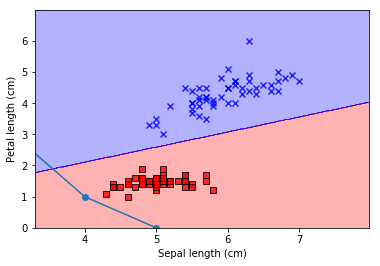

In [4]:
%autoreload
from perceptron import Perceptron
def use_perceptron():
    pc = Perceptron()
    errors = pc.fit(X, y)
    error_plot(errors)
    return pc
    
pc = use_perceptron()

plot_decision_regions(X, y, pc)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.show()

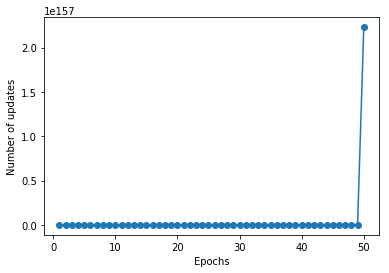

In [5]:
%autoreload
from perceptron import AdalinePerceptron
def use_adaline():
    pc = AdalinePerceptron()
    errors = pc.fit(X, y)
    error_plot(errors)
    
use_adaline()